In [2]:
import pandas as pd
import numpy as np

In [3]:
def dataTransformation(csvFile):
    df = pd.read_csv(csvFile)

    df['CTRL_TIME(sec)'] = df['CTRL_TIME(sec)'].fillna(0)
    df['Round'] = df['Round'].apply(lambda x: int(x.split(' ')[1]))
    df = df.astype({'TitleFight':'category', 'Round':'int8','KD': 'int8', 'SIG_STR_LAND': 'int16', 'SIG_STR_ATT':'int16', 'TOTAL_STR_LAND':'int16',
                'TOTAL_STR_ATT':'int16', 'TD':'int8', 'TD_ATT':'int8', 'SubAtt':'int8', 'Reversal':'int8',
                'CTRL_TIME(sec)':'int16', 'HEAD_LAND':'int16', 'HEAD_ATT':'int16', 'BODY_LAND':'int16',
                'BODY_ATT':'int16', 'LEG_LAND':'int16', 'LEG_ATT':'int16', 'STD_STR_LAND':'int16', 'STD_STR_ATT':'int16',
                'CLINCH_STR_LAND':'int16', 'CLINCH_STR_ATT':'int16', 'GRD_STR_LAND':'int16', 'GRD_STR_ATT':'int16',
                'WIN_BY':'category', 'Round_Time(sec)':'int16', 'LAST_ROUND':'int8', 'FORMAT':'int8'})
    return df

In [ ]:
df = dataTransformation('FightTotals.csv')
df.head()

In [44]:
df2 = df.copy()
m = df2.merge(df, on=['Event', 'Bout', 'Round'])

In [80]:
totals = m[m['Fighter_x'] != m['Fighter_y']].groupby('Fighter_x').sum().reset_index()

defensive_fighter_totals = totals[['Fighter_x', 'KD_y', 'SIG_STR_LAND_y',
       'SIG_STR_ATT_y', 'TOTAL_STR_LAND_y', 'TOTAL_STR_ATT_y', 'TD_y',
       'TD_ATT_y', 'SubAtt_y', 'Reversal_y', 'CTRL_TIME(sec)_y', 'HEAD_LAND_y',
       'HEAD_ATT_y', 'BODY_LAND_y', 'BODY_ATT_y', 'LEG_LAND_y', 'LEG_ATT_y',
       'STD_STR_LAND_y', 'STD_STR_ATT_y', 'CLINCH_STR_LAND_y',
       'CLINCH_STR_ATT_y', 'GRD_STR_LAND_y', 'GRD_STR_ATT_y', 'Round_Time(sec)_y']]

In [81]:
defensive_fighter_totals.columns = ['Fighter', 'KD', 'SIG_STR_LAND', 
                     'SIG_STR_ATT', 'TOTAL_STR_LAND', 'TOTAL_STR_ATT', 'TD', 
                     'TD_ATT', 'SubAtt', 'Reversal', 'CTRL_TIME(sec)', 'HEAD_LAND', 
                     'HEAD_ATT', 'BODY_LAND', 'BODY_ATT', 'LEG_LAND', 'LEG_ATT',
                     'STD_STR_LAND', 'STD_STR_ATT', 'CLINCH_STR_LAND', 
                     'CLINCH_STR_ATT', 'GRD_STR_LAND', 'GRD_STR_ATT', 'Round_Time(sec)']

In [82]:
defensive_fighter_totals.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Round_Time(sec)
0,AJ Dobson,0.0,198,374,301,501,6.0,17.0,0.0,0.0,...,48,53,57,135,290,16,20,47,64,1800
1,AJ Fletcher,0.0,169,315,295,451,3.0,5.0,0.0,0.0,...,42,16,18,116,240,13,21,40,54,1800
2,Aalon Cruz,1.0,65,92,84,112,0.0,0.0,0.0,0.0,...,2,2,2,9,14,7,8,49,70,185
3,Aaron Brink,0.0,2,4,2,4,1.0,1.0,2.0,0.0,...,0,1,1,2,2,0,2,0,0,55
4,Aaron Phillips,0.0,129,213,257,360,14.0,25.0,2.0,1.0,...,30,10,13,25,60,31,40,73,113,2249


## Get the data to be in a per minute scale

The purpose for this is becuase some fighters have fought 20 times in the UFC whereas some have only fought once. So by going to a per minute basis, it "standardizes' the stats.

In [ ]:
defensive_fighter_totals['Round_Time(sec)'] = defensive_fighter_totals['Round_Time(sec)'] / 60

for c in defensive_fighter_totals.loc[:, 'KD':'GRD_STR_ATT'].columns:
    defensive_fighter_totals[c] = defensive_fighter_totals[c] / defensive_fighter_totals['Round_Time(sec)']

defensive_fighter_totals.rename(columns = {'Round_Time(sec)':'Fight_Time(min)'}, inplace=True)

In [84]:
defensive_fighter_totals.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,AJ Dobson,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,...,1.600000,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333,30.000000
1,AJ Fletcher,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,...,1.400000,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000,30.000000
2,Aalon Cruz,0.324324,21.081081,29.837838,27.243243,36.324324,0.000000,0.000000,0.000000,0.000000,...,0.648649,0.648649,0.648649,2.918919,4.540541,2.270270,2.594595,15.891892,22.702703,3.083333
3,Aaron Brink,0.000000,2.181818,4.363636,2.181818,4.363636,1.090909,1.090909,2.181818,0.000000,...,0.000000,1.090909,1.090909,2.181818,2.181818,0.000000,2.181818,0.000000,0.000000,0.916667
4,Aaron Phillips,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,...,0.800356,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673,37.483333


# Starting the process of clustering

Select the fighters that have at least 15 minutes of fight time (This is equivalent to 3 round fight). These fighters that have less than 15 minutes of fight time serve as outliers. Their stats may have exraordinarily high per minute outputs due to quick finishes. 

In [85]:
fightTot15 = defensive_fighter_totals[defensive_fighter_totals['Fight_Time(min)'] >= 15]
fightTot15.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,AJ Dobson,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,...,1.600000,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333,30.000000
1,AJ Fletcher,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,...,1.400000,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000,30.000000
4,Aaron Phillips,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,...,0.800356,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673,37.483333
5,Aaron Riley,0.020972,3.911220,10.003495,5.274380,11.419084,0.115344,0.293604,0.000000,0.000000,...,1.300245,0.293604,0.566236,2.715834,7.979727,1.048584,1.761622,0.146802,0.262146,95.366667
6,Aaron Rosa,0.000000,4.515753,9.101517,9.451575,15.017503,0.070012,0.490082,0.000000,0.000000,...,0.665111,0.735123,0.875146,2.940490,7.211202,1.050175,1.330222,0.525088,0.560093,28.566667


In [86]:
names = fightTot15['Fighter'].tolist()
totals = fightTot15.drop(['Fighter','Fight_Time(min)'], axis=1)

In [87]:
totals.head()

,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,CTRL_TIME(sec),...,BODY_LAND,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT
0,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,18.566667,...,1.466667,1.600000,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333
1,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,20.700000,...,1.100000,1.400000,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000
4,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,45.593597,...,0.560249,0.800356,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673
5,0.020972,3.911220,10.003495,5.274380,11.419084,0.115344,0.293604,0.000000,0.000000,4.257253,...,1.038099,1.300245,0.293604,0.566236,2.715834,7.979727,1.048584,1.761622,0.146802,0.262146
6,0.000000,4.515753,9.101517,9.451575,15.017503,0.070012,0.490082,0.000000,0.000000,27.934656,...,0.560093,0.665111,0.735123,0.875146,2.940490,7.211202,1.050175,1.330222,0.525088,0.560093


## Two routes to try - Data Normilization vs Data Standardization

### Data Normilization

In [88]:
from sklearn import preprocessing
x_Normal = totals.values
scaler = preprocessing.MinMaxScaler()
x_scaled_Normal = scaler.fit_transform(x_Normal)
X_norm = pd.DataFrame(x_scaled_Normal)

#### PCA

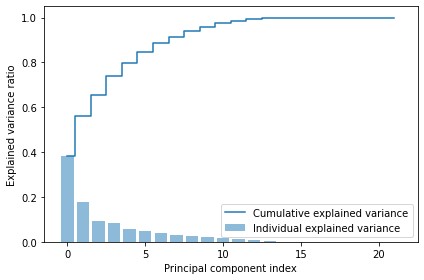

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA() # 2D PCA for the plot
reduced_Normal = pd.DataFrame(pca.fit_transform(X_norm))


exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [90]:
for i in cum_sum_eigenvalues:
    if i > .9:
        break

pca_Normal = PCA(n_components=i)
reduced_Normal = pd.DataFrame(pca_Normal.fit_transform(X_norm))

### Data Standardization

In [91]:
from sklearn import preprocessing
x_Standard = totals.values
scaler = preprocessing.StandardScaler()
x_scaled_Standard = scaler.fit_transform(x_Standard)
X_stand = pd.DataFrame(x_scaled_Standard)

#### PCA

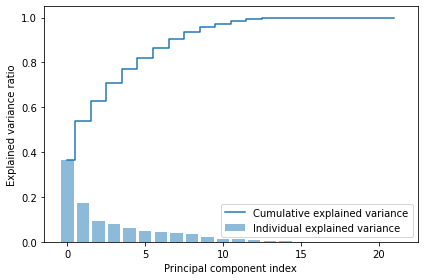

In [92]:
from sklearn.decomposition import PCA
pca = PCA() # 2D PCA for the plot
reduced_Standard = pd.DataFrame(pca.fit_transform(X_stand))

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [93]:
for i in cum_sum_eigenvalues:
    if i > .9:
        break

pca_stand = PCA(n_components=i)
reduced_Standard = pd.DataFrame(pca_stand.fit_transform(X_stand))

# K-Means Clustering

##Using the Normalized Data


In [94]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5, random_state=22)

# fit the input data
kmeans = kmeans.fit(reduced_Normal)

# get the cluster labels
labels = kmeans.predict(reduced_Normal)

# cluster values
clusters = kmeans.labels_.tolist()

reduced_Normal['cluster'] = clusters

reduced_Normal['name'] = names
# reduced_Normal.columns = ['x', 'y', 'cluster', 'Fighter']
reduced_Normal.head()

,0,1,2,3,4,5,6,7,8,cluster,name
0,0.616217,0.370496,-0.220347,0.423987,-0.133480,-0.080114,-0.054876,-0.046445,0.079324,1,AJ Dobson
1,0.329537,0.308619,-0.129670,-0.107308,-0.050529,-0.105424,-0.117802,-0.138889,-0.040769,3,AJ Fletcher
2,-0.457175,0.662559,-0.085998,0.102917,0.035673,0.008134,0.036446,-0.023245,-0.065484,4,Aaron Phillips
3,0.277424,-0.015264,0.197352,-0.112423,0.149242,0.141734,0.010522,-0.023986,-0.004772,3,Aaron Riley
4,0.158171,0.306242,-0.031664,0.084410,-0.074455,0.202892,0.015961,-0.197146,-0.131350,3,Aaron Rosa


### Join the cluster a fighter belongs to with the fighter_totals dataframe

In [95]:
nameAndClusterNormal = reduced_Normal.loc[:, ['name', 'cluster']]
nameAndClusterNormal.columns = ['Fighter', 'cluster']
nameAndClusterNormal.head()

,Fighter,cluster
0,AJ Dobson,1
1,AJ Fletcher,3
2,Aaron Phillips,4
3,Aaron Riley,3
4,Aaron Rosa,3


##Using the Standardized Data

In [96]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5, random_state=22)

# fit the input data
kmeans = kmeans.fit(reduced_Standard)

# get the cluster labels
labels = kmeans.predict(reduced_Standard)

# cluster values
clusters = kmeans.labels_.tolist()

reduced_Standard['cluster'] = clusters
reduced_Standard['name'] = names
# reduced_Standard.columns = ['x', 'y', 'cluster', 'Fighter']
reduced_Standard.head()

,0,1,2,3,4,5,6,7,8,cluster,name
0,5.539052,2.558661,-1.247131,3.681475,-2.302570,-0.477849,-0.706708,-0.380093,-0.301657,3,AJ Dobson
1,3.466566,2.468016,-1.345169,-0.459134,-0.189906,-0.894683,-1.256194,-0.905464,0.298808,3,AJ Fletcher
2,-2.614881,5.422994,-0.210219,1.705658,0.299995,-0.255640,-0.377332,-0.583293,-0.966509,2,Aaron Phillips
3,2.051468,-0.336774,1.744920,-0.502555,1.633348,0.473388,-0.201275,-0.664328,-0.109174,4,Aaron Riley
4,2.121998,1.665695,0.501775,0.989574,0.207095,0.501911,0.507299,-2.348465,-0.036456,4,Aaron Rosa


### Join the cluster a fighter belongs to with the fighter_totals dataframe

In [97]:
nameAndClusterStandard = reduced_Standard.loc[:, ['name', 'cluster']]
nameAndClusterStandard.columns = ['Fighter', 'cluster']
nameAndClusterStandard.head()

,Fighter,cluster
0,AJ Dobson,3
1,AJ Fletcher,3
2,Aaron Phillips,2
3,Aaron Riley,4
4,Aaron Rosa,4


## Compare the Clusters from Normalized Data vs Standardized Data

In [98]:
pd.merge(nameAndClusterNormal,nameAndClusterStandard, on='Fighter', suffixes=('_N', '_S'))

,Fighter,cluster_N,cluster_S
0,AJ Dobson,1,3
1,AJ Fletcher,3,3
2,Aaron Phillips,4,2
3,Aaron Riley,3,4
4,Aaron Rosa,3,4
...,...,...,...
1845,Zhang Lipeng,2,0
1846,Zhang Tiequan,4,2
1847,Zhang Weili,0,1
1848,Zubaira Tukhugov,0,1


Normalized cluster

In [99]:
f15normal = pd.merge(fightTot15, nameAndClusterNormal, on='Fighter')
f15normal.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,...,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333,30.000000,1
1,AJ Fletcher,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,...,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000,30.000000,3
2,Aaron Phillips,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,...,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673,37.483333,4
3,Aaron Riley,0.020972,3.911220,10.003495,5.274380,11.419084,0.115344,0.293604,0.000000,0.000000,...,0.293604,0.566236,2.715834,7.979727,1.048584,1.761622,0.146802,0.262146,95.366667,3
4,Aaron Rosa,0.000000,4.515753,9.101517,9.451575,15.017503,0.070012,0.490082,0.000000,0.000000,...,0.735123,0.875146,2.940490,7.211202,1.050175,1.330222,0.525088,0.560093,28.566667,3


Standardized cluster

In [100]:
f15standard = pd.merge(fightTot15, nameAndClusterStandard, on='Fighter')
f15standard.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,...,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333,30.000000,3
1,AJ Fletcher,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,...,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000,30.000000,3
2,Aaron Phillips,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,...,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673,37.483333,2
3,Aaron Riley,0.020972,3.911220,10.003495,5.274380,11.419084,0.115344,0.293604,0.000000,0.000000,...,0.293604,0.566236,2.715834,7.979727,1.048584,1.761622,0.146802,0.262146,95.366667,4
4,Aaron Rosa,0.000000,4.515753,9.101517,9.451575,15.017503,0.070012,0.490082,0.000000,0.000000,...,0.735123,0.875146,2.940490,7.211202,1.050175,1.330222,0.525088,0.560093,28.566667,4


In [101]:
f15normalGrouped = f15normal.groupby('cluster').mean().round(3).reset_index()
f15normalGrouped.insert(0, column='Version', value=['Normal' for x in range(5)])

f15standardGrouped = f15standard.groupby('cluster').mean().round(3).reset_index()
f15standardGrouped.insert(0, column='Version', value=['Standard' for x in range(5)])

pd.concat([f15normalGrouped, f15standardGrouped]).sort_values('SIG_STR_LAND')

,Version,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,Standard,0,0.020,2.306,5.305,4.205,7.449,0.103,0.258,0.052,...,0.686,0.381,0.490,1.454,4.060,0.404,0.590,0.447,0.655,86.368
2,Normal,2,0.021,2.409,5.535,4.225,7.574,0.091,0.236,0.050,...,0.707,0.387,0.498,1.551,4.288,0.408,0.595,0.451,0.653,92.199
4,Normal,4,0.025,2.634,5.201,5.986,9.036,0.242,0.457,0.080,...,0.598,0.326,0.402,1.127,2.933,0.374,0.548,1.132,1.720,37.899
2,Standard,2,0.026,2.923,5.668,6.460,9.696,0.252,0.461,0.087,...,0.645,0.331,0.408,1.175,3.049,0.369,0.543,1.378,2.076,36.495
1,Standard,1,0.023,3.750,8.744,5.062,10.243,0.087,0.256,0.025,...,1.130,0.712,0.881,2.987,7.632,0.406,0.592,0.358,0.520,96.190
0,Normal,0,0.023,3.780,8.816,5.082,10.307,0.087,0.259,0.026,...,1.133,0.737,0.912,3.005,7.685,0.406,0.593,0.369,0.538,94.249
4,Standard,4,0.034,4.316,8.437,7.263,11.769,0.121,0.286,0.048,...,1.381,0.502,0.600,2.299,5.614,1.225,1.686,0.792,1.137,47.155
3,Normal,3,0.031,4.396,8.557,7.343,11.885,0.131,0.299,0.050,...,1.399,0.482,0.579,2.390,5.748,1.154,1.589,0.853,1.220,48.206
1,Normal,1,0.025,5.914,13.092,7.122,14.479,0.067,0.207,0.023,...,1.679,0.852,1.019,4.939,11.694,0.606,0.876,0.368,0.522,65.561
3,Standard,3,0.026,5.963,12.953,7.317,14.503,0.075,0.219,0.026,...,1.653,0.830,0.994,4.918,11.460,0.611,0.880,0.434,0.613,62.502


## Examine the clusters

Going with the K-means cluster that used Standardized Scaling

In [102]:
fightTot15 = f15standard.copy()
fightTot15.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.000000,6.600000,12.466667,10.033333,16.700000,0.200000,0.566667,0.000000,0.000000,...,1.766667,1.900000,4.500000,9.666667,0.533333,0.666667,1.566667,2.133333,30.000000,3
1,AJ Fletcher,0.000000,5.633333,10.500000,9.833333,15.033333,0.100000,0.166667,0.000000,0.000000,...,0.533333,0.600000,3.866667,8.000000,0.433333,0.700000,1.333333,1.800000,30.000000,3
2,Aaron Phillips,0.000000,3.441530,5.682526,6.856381,9.604269,0.373499,0.666963,0.053357,0.026679,...,0.266785,0.346821,0.666963,1.600711,0.827034,1.067141,1.947532,3.014673,37.483333,2
3,Aaron Riley,0.020972,3.911220,10.003495,5.274380,11.419084,0.115344,0.293604,0.000000,0.000000,...,0.293604,0.566236,2.715834,7.979727,1.048584,1.761622,0.146802,0.262146,95.366667,4
4,Aaron Rosa,0.000000,4.515753,9.101517,9.451575,15.017503,0.070012,0.490082,0.000000,0.000000,...,0.735123,0.875146,2.940490,7.211202,1.050175,1.330222,0.525088,0.560093,28.566667,4


In [103]:
f15standardGrouped = f15standard.groupby('cluster').mean().round(3).reset_index()
f15standardGrouped

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0,0.020,2.306,5.305,4.205,7.449,0.103,0.258,0.052,0.020,...,0.686,0.381,0.490,1.454,4.060,0.404,0.590,0.447,0.655,86.368
1,1,0.023,3.750,8.744,5.062,10.243,0.087,0.256,0.025,0.010,...,1.130,0.712,0.881,2.987,7.632,0.406,0.592,0.358,0.520,96.190
2,2,0.026,2.923,5.668,6.460,9.696,0.252,0.461,0.087,0.018,...,0.645,0.331,0.408,1.175,3.049,0.369,0.543,1.378,2.076,36.495
3,3,0.026,5.963,12.953,7.317,14.503,0.075,0.219,0.026,0.007,...,1.653,0.830,0.994,4.918,11.460,0.611,0.880,0.434,0.613,62.502
4,4,0.034,4.316,8.437,7.263,11.769,0.121,0.286,0.048,0.015,...,1.381,0.502,0.600,2.299,5.614,1.225,1.686,0.792,1.137,47.155


Cluster averages vs the UFC average

In [105]:
defensive_fighter_totalsDescriptiveStats = defensive_fighter_totals.describe().round(3).reset_index(drop=False)
defensive_fighter_totalsDescriptiveStats = defensive_fighter_totalsDescriptiveStats[defensive_fighter_totalsDescriptiveStats['index'] == 'mean']

clustersVSufc = pd.concat([f15standardGrouped, defensive_fighter_totalsDescriptiveStats]).reset_index(drop=True)
clustersVSufc = clustersVSufc.drop('index', axis=1)
clustersVSufc['cluster'][5] = 'UFC'
clustersVSufc

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0.0,0.020,2.306,5.305,4.205,7.449,0.103,0.258,0.052,0.020,...,0.686,0.381,0.490,1.454,4.060,0.404,0.590,0.447,0.655,86.368
1,1.0,0.023,3.750,8.744,5.062,10.243,0.087,0.256,0.025,0.010,...,1.130,0.712,0.881,2.987,7.632,0.406,0.592,0.358,0.520,96.190
2,2.0,0.026,2.923,5.668,6.460,9.696,0.252,0.461,0.087,0.018,...,0.645,0.331,0.408,1.175,3.049,0.369,0.543,1.378,2.076,36.495
3,3.0,0.026,5.963,12.953,7.317,14.503,0.075,0.219,0.026,0.007,...,1.653,0.830,0.994,4.918,11.460,0.611,0.880,0.434,0.613,62.502
4,4.0,0.034,4.316,8.437,7.263,11.769,0.121,0.286,0.048,0.015,...,1.381,0.502,0.600,2.299,5.614,1.225,1.686,0.792,1.137,47.155
5,UFC,0.049,3.696,7.768,5.967,10.328,0.143,0.303,0.083,0.020,...,0.980,0.532,0.668,2.240,5.681,0.590,0.840,0.866,1.248,62.248


# A test to see how well we clustered a fighters offensive stats

In [111]:
def defensiveSimilarity(df, fighter, startCol: int, endCol: int):
    """
    Fighter: The fighter you want to see who compares to
    startCol: should be an index of the column
    endCol: should be an index of the column
    """
    sim_dict = {}

    fighterIndex = df[df['Fighter'] == fighter].index
    fi = fighterIndex[0]

    for i in range(len(df)):
        simTotal = 0
        if i == fi:
            continue
        for col in range(startCol, endCol+1):
            simTotal += (df.iloc[fi, col] - df.iloc[i, col]) ** 2

        if len(sim_dict) == 0:
            sim_dict = {df.iloc[i,0]:simTotal ** (1/2)}

        sim_dict[df.iloc[i,0]] = simTotal ** (1/2)

    sdf = pd.DataFrame.from_dict(sim_dict, orient='index').reset_index()
    sdf = sdf.rename(columns={'index':'Fighter', 0:'Similarity'})
    sdf = sdf.sort_values('Similarity')
    return sdf.reset_index(drop=True)
        

Grab just the fighters in cluster zero

In [112]:
o = fightTot15[fightTot15['cluster'] == 0].reset_index(drop=True)
o.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,Aaron Simpson,0.007892,2.525319,5.760884,3.890570,7.212942,0.039458,0.236749,0.015783,0.007892,...,0.599763,0.694463,1.183743,3.732737,1.144285,1.807181,0.197291,0.220965,126.716667,0
1,Abel Trujillo,0.009691,2.306574,5.717978,3.382329,7.055403,0.329511,0.552415,0.116298,0.000000,...,0.426425,0.649330,1.705702,4.719754,0.339202,0.620255,0.261670,0.377968,103.183333,0
2,Adam Wieczorek,0.000000,1.865705,3.623254,4.218116,6.678684,0.189274,0.459667,0.000000,0.000000,...,0.351510,0.405588,0.865255,2.244254,0.297431,0.351510,0.703019,1.027490,36.983333,0
3,Adlan Amagov,0.000000,0.500000,3.722222,1.555556,4.777778,0.000000,0.166667,0.000000,0.000000,...,0.333333,0.777778,0.388889,3.444444,0.111111,0.277778,0.000000,0.000000,18.000000,0
4,Adriano Martins,0.034833,1.880987,5.956459,1.915820,5.991292,0.017417,0.121916,0.000000,0.000000,...,0.592163,0.940493,1.811321,5.851959,0.034833,0.069666,0.034833,0.034833,57.416667,0


Do the similarity for the fighters only in cluster zero

In [116]:
cluster0SIM = defensiveSimilarity(o, 'Amanda Nunes', 1, 22)
cluster0SIM.head(10)


,Fighter,Similarity
0,Clifford Starks,1.256801
1,Rustam Khabilov,1.436508
2,Chris Weidman,1.472118
3,Beneil Dariush,1.476945
4,Jacob Malkoun,1.488622
5,Ramazan Emeev,1.653362
6,Cathal Pendred,1.674173
7,Jake O'Brien,1.696129
8,Mike Pierce,1.787932
9,Evan Tanner,1.832696


Now do the similarity for all fighters regardless of cluster

In [117]:
allUFCsimilarity = defensiveSimilarity(defensive_fighter_totals, 'Amanda Nunes', 1, 22).head(10)
allUFCsimilarity

,Fighter,Similarity
0,Clifford Starks,1.256801
1,Rustam Khabilov,1.436508
2,Chris Weidman,1.472118
3,Beneil Dariush,1.476945
4,Jacob Malkoun,1.488622
5,Ramazan Emeev,1.653362
6,Cathal Pendred,1.674173
7,Jake O'Brien,1.696129
8,Mike Pierce,1.787932
9,Evan Tanner,1.832696


10 out of the top 10 for **allUFCsimilarity** also appeared in the top 10 of similarity for **cluster0SIM** (cluster 0). 

In [118]:
cluster0SIM.merge(allUFCsimilarity, on=['Fighter', 'Similarity'], how='inner')

,Fighter,Similarity
0,Clifford Starks,1.256801
1,Rustam Khabilov,1.436508
2,Chris Weidman,1.472118
3,Beneil Dariush,1.476945
4,Jacob Malkoun,1.488622
5,Ramazan Emeev,1.653362
6,Cathal Pendred,1.674173
7,Jake O'Brien,1.696129
8,Mike Pierce,1.787932
9,Evan Tanner,1.832696


# Predict which cluster a fighter will belong to

In the beginning i said that we were leaving out fighters with less than 15 minutes of fight time for the K-means classifier. Now were going to try to predict which cluster those fighters belong to with our trained K-means classifier



## Decision Tree

In [119]:
lessThan15 = defensive_fighter_totals[defensive_fighter_totals['Fight_Time(min)'] <15]
dataToPredict = lessThan15.drop(['Fighter', 'Fight_Time(min)'], axis=1)
dataToPredict.head()

X = fightTot15.drop(['Fighter', 'Fight_Time(min)', 'cluster'], axis=1)

y = fightTot15['cluster']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size=30)

In [120]:
# Create Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

# Making Predictions with Our Model
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8


## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(accuracy_score(y_test, prediction))

0.6666666666666666
0.6666666666666666


## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy', random_state=100)   
rf_clf.fit(X_train,y_train)

y_predict = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_predict))

0.9333333333333333


## Prediciton

In [123]:
predicted_cluster = rf_clf.predict(dataToPredict)
lessThan15Predicitons = lessThan15.copy()
lessThan15Predicitons['cluster'] = predicted_cluster
lessThan15Predicitons.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
2,Aalon Cruz,0.324324,21.081081,29.837838,27.243243,36.324324,0.000000,0.000000,0.000000,0.00000,...,0.648649,0.648649,2.918919,4.540541,2.27027,2.594595,15.891892,22.702703,3.083333,4
3,Aaron Brink,0.000000,2.181818,4.363636,2.181818,4.363636,1.090909,1.090909,2.181818,0.00000,...,1.090909,1.090909,2.181818,2.181818,0.00000,2.181818,0.000000,0.000000,0.916667,0
8,Aaron Wilkinson,0.000000,0.000000,0.975610,3.902439,4.878049,0.487805,0.487805,0.975610,0.97561,...,0.000000,0.000000,0.000000,0.975610,0.00000,0.000000,0.000000,0.000000,2.050000,0
10,Abdul-Kerim Edilov,0.000000,0.132743,1.725664,0.929204,2.787611,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.132743,1.460177,0.00000,0.132743,0.000000,0.132743,7.533333,0
15,Abus Magomedov,0.000000,0.000000,6.315789,0.000000,6.315789,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,6.315789,0.00000,0.000000,0.000000,0.000000,0.316667,0


In [124]:
lessThan15Predicitons['cluster'].value_counts()

0    137
2    132
4     87
3     49
1     41
Name: cluster, dtype: int64

In [125]:
lessThan15PredicitonsGrouped = lessThan15Predicitons.groupby('cluster').mean()
lessThan15PredicitonsGrouped.reset_index(inplace=True)

lessThan15PredicitonsGrouped

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0,0.038326,1.525104,3.511431,3.568437,5.764300,0.184041,0.325272,0.323578,0.058238,...,0.383164,0.311621,0.436605,0.823873,2.488185,0.375547,0.569421,0.325684,0.453825,6.627737
1,1,0.064614,4.081100,8.590020,4.935341,9.616589,0.125682,0.274778,0.104787,0.000000,...,0.852993,1.119607,1.474039,3.432823,7.680835,0.213728,0.315887,0.434549,0.593298,7.110569
2,2,0.027441,4.503005,6.835558,9.632396,12.557884,0.446391,0.578017,0.247625,0.028890,...,0.466302,0.166582,0.243292,0.542207,1.401046,0.233720,0.312350,3.727078,5.122162,6.202273
3,3,0.685988,9.818919,19.865769,11.722333,21.975631,0.121996,0.193276,0.123821,0.000000,...,1.894797,1.328012,1.803392,6.156633,14.490863,1.319524,2.077615,2.342762,3.297291,5.582993
4,4,0.278980,7.121702,11.898919,12.200507,17.440117,0.210900,0.359614,0.222075,0.074955,...,1.679419,0.528249,0.648817,1.568139,4.051876,2.681661,3.562008,2.871902,4.285036,5.495785


## Results

In [126]:
lessThan15PredicitonsGrouped.insert(0, column='New Prediction', value=['YES' for x in range(5)])
f15standardGrouped.insert(0, column='New Prediction', value=['NO' for x in range(5)])
results = pd.concat([lessThan15PredicitonsGrouped, f15standardGrouped]).sort_values('cluster')
results.reset_index(drop=True, inplace=True)
results

,New Prediction,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,YES,0,0.038326,1.525104,3.511431,3.568437,5.764300,0.184041,0.325272,0.323578,...,0.383164,0.311621,0.436605,0.823873,2.488185,0.375547,0.569421,0.325684,0.453825,6.627737
1,NO,0,0.020000,2.306000,5.305000,4.205000,7.449000,0.103000,0.258000,0.052000,...,0.686000,0.381000,0.490000,1.454000,4.060000,0.404000,0.590000,0.447000,0.655000,86.368000
2,YES,1,0.064614,4.081100,8.590020,4.935341,9.616589,0.125682,0.274778,0.104787,...,0.852993,1.119607,1.474039,3.432823,7.680835,0.213728,0.315887,0.434549,0.593298,7.110569
3,NO,1,0.023000,3.750000,8.744000,5.062000,10.243000,0.087000,0.256000,0.025000,...,1.130000,0.712000,0.881000,2.987000,7.632000,0.406000,0.592000,0.358000,0.520000,96.190000
4,YES,2,0.027441,4.503005,6.835558,9.632396,12.557884,0.446391,0.578017,0.247625,...,0.466302,0.166582,0.243292,0.542207,1.401046,0.233720,0.312350,3.727078,5.122162,6.202273
5,NO,2,0.026000,2.923000,5.668000,6.460000,9.696000,0.252000,0.461000,0.087000,...,0.645000,0.331000,0.408000,1.175000,3.049000,0.369000,0.543000,1.378000,2.076000,36.495000
6,YES,3,0.685988,9.818919,19.865769,11.722333,21.975631,0.121996,0.193276,0.123821,...,1.894797,1.328012,1.803392,6.156633,14.490863,1.319524,2.077615,2.342762,3.297291,5.582993
7,NO,3,0.026000,5.963000,12.953000,7.317000,14.503000,0.075000,0.219000,0.026000,...,1.653000,0.830000,0.994000,4.918000,11.460000,0.611000,0.880000,0.434000,0.613000,62.502000
8,YES,4,0.278980,7.121702,11.898919,12.200507,17.440117,0.210900,0.359614,0.222075,...,1.679419,0.528249,0.648817,1.568139,4.051876,2.681661,3.562008,2.871902,4.285036,5.495785
9,NO,4,0.034000,4.316000,8.437000,7.263000,11.769000,0.121000,0.286000,0.048000,...,1.381000,0.502000,0.600000,2.299000,5.614000,1.225000,1.686000,0.792000,1.137000,47.155000


Results have a little more range than the results from the offensive fighter statistics. Seems logical since these are guys with less than 15 minutes of fight time. That could be due to the fact that they get finished quickly and ground and pound happened. 